In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
# informatii despre coloane
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
#reprezentam sexul cu valorile 0 si 1
df['sex'] = df['sex'].map(
    {'male' : 0,'female' : 1}
)

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [18]:
#reprezentam smoker cu valorile 0 si 1
df['smoker'] = df['smoker'].map(
    {'yes' : 0,'no' : 1}
)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [20]:
#stergem coloana region cu dummies variable pentru ca are mai multe valori
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [21]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,1
1,18,0,33.770,1,1,1725.55230,0,1,0
2,28,0,33.000,3,1,4449.46200,0,1,0
3,33,0,22.705,0,1,21984.47061,1,0,0
4,32,0,28.880,0,1,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,1,0,0
1334,18,1,31.920,0,1,2205.98080,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,1


In [22]:
# vedem rezultatel dupa status
X = df.drop(['bmi'], axis=1).values
y = df['bmi'].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# antrenam
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# importam 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
# vedem la linear ce acuratete are
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = linear.predict(X_test)

In [30]:
mean_absolute_error(y_pred, y_test)

4.410534201684265

In [32]:
# vedem la knn ce acuratete are
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [33]:
y_pred = knn.predict(X_test)

In [34]:
mean_absolute_error(y_pred, y_test)

5.092405970149255

In [35]:
# vedem la decision ce acuratete are
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
y_pred = tree.predict(X_test)

In [37]:
mean_absolute_error(y_test, y_pred)

5.625761194029851

In [38]:
# vedem la forest ce acuratete are
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
y_pred = forest.predict(X_test)

In [48]:
mean_absolute_error(y_test, y_pred)

4.504442388059702

In [49]:
def plot_reg(X, y, algo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    plt.scatter(X_test.reshape(-1, 1), y_test)
    x_min, x_max = np.min(X_test), np.max(X_test)
    X_pred = np.linspace(x_min, x_max, 100)
    plt.plot(X_pred, algo.predict(X_pred.reshape(-1, 1)), c='red')
    plt.show()

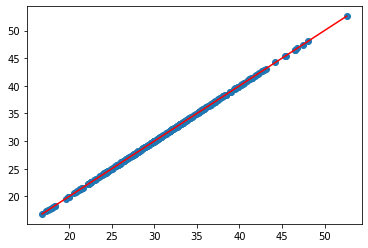

In [50]:
plot_reg(df[['bmi']].values, y, linear)

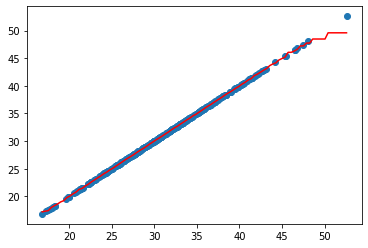

In [51]:
plot_reg(df[['bmi']].values, y, knn)

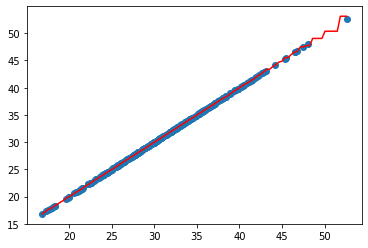

In [52]:
plot_reg(df[['bmi']].values, y, tree)

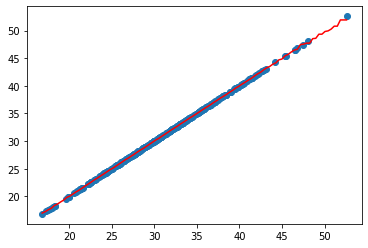

In [53]:
plot_reg(df[['bmi']].values, y, forest)

In [54]:
# LinearRegression are o eroare de 4.410534201684265
# el este cel mai bun